In [1]:
import pandas as pd
import numpy as np
import random 
import os
import joblib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score,confusion_matrix, silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
os.chdir("/Users/yj.noh/Documents/GitHub")
print(os.getcwd())

/Users/yj.noh/Documents/GitHub


In [3]:
df_A = pd.read_csv("/Users/yj.noh/Desktop/df_A.csv", encoding = "cp949")
df_B = pd.read_csv("/Users/yj.noh/Desktop/df_B.csv", encoding = "cp949")
print(df_A.head())

                                     target_rider_id agency_name  dlvry_cnt  \
0  EC9BCD10C0F7BB9E71F314B57571420BCDC9863BBE68CA...       수도권북부         38   
1  32377561780220413E7CED768B3B72378FA057D587B3DB...       수도권남부          0   
2  DF39B6AAAC4B2C1EBD5F5F298FC22B4F8697770FC54D19...         경상권          0   
3  C4C6771694269CCB18253581AC2B00681C1D1867C8D549...       수도권북부         11   
4  A971E2D6A1CA45A60D925A947CB3B9D9FFD1450B65E960...       수도권남부          0   

   crm_cnt  crm_success_pay  avg_week_dlvry_cnt  avg_week_day_cnt  \
0        3            12000               19.25             2.375   
1        0                0               15.00             2.000   
2        0                0               13.00             2.500   
3        3            12000               12.00             2.400   
4        0                0               15.50             2.000   

   dlvry_cnt_group  day_cnt_group group_final  is_goal  is_react  
0                4              3         A

In [9]:
num_vars = ['dlvry_cnt', 'crm_cnt', 'avg_week_dlvry_cnt', 'avg_week_day_cnt']
group_name = df_A['group_final'].unique()
print(group_name)

['A_3' 'A_4']


In [14]:
def plot_numeric(data, numeric_vars, outcome, group_name):
    palette = 'coolwarm'

    for group in group_name:
        
      #  os.makedirs(f'graph/{method}', exist_ok=True)
        group_data = data[data['group_final'] == group]

        for num_var in numeric_vars:
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            fig.suptitle(f'{group} - {num_var}', fontsize=12)

            # Boxplot
            sns.boxplot(ax=axs[0], x=outcome, y=num_var, data=group_data, palette=palette)
            axs[0].set_title('Boxplot')

            # Violinplot
            sns.violinplot(ax=axs[1], x=outcome, y=num_var, data=group_data, palette=palette)
            axs[1].set_title('Violinplot')

            # KDE plot
            sns.kdeplot(ax=axs[2], data=group_data, x=num_var, hue=outcome, fill=True, common_norm=False, palette=palette, alpha=.5, linewidth=0)
            axs[2].set_title('Density plot')

            plt.tight_layout()
            fig.subplots_adjust(top=0.85)

            # 각 method별 폴더에 그래프 저장
           # fig.savefig(f'graph/{method}/{method}_{num_var}_분포.png')
            plt.show()
            plt.close(fig)

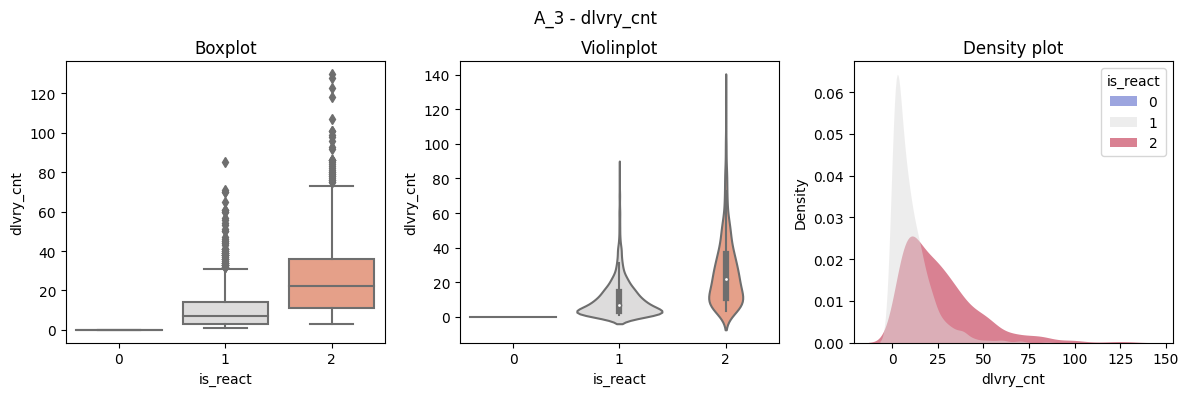

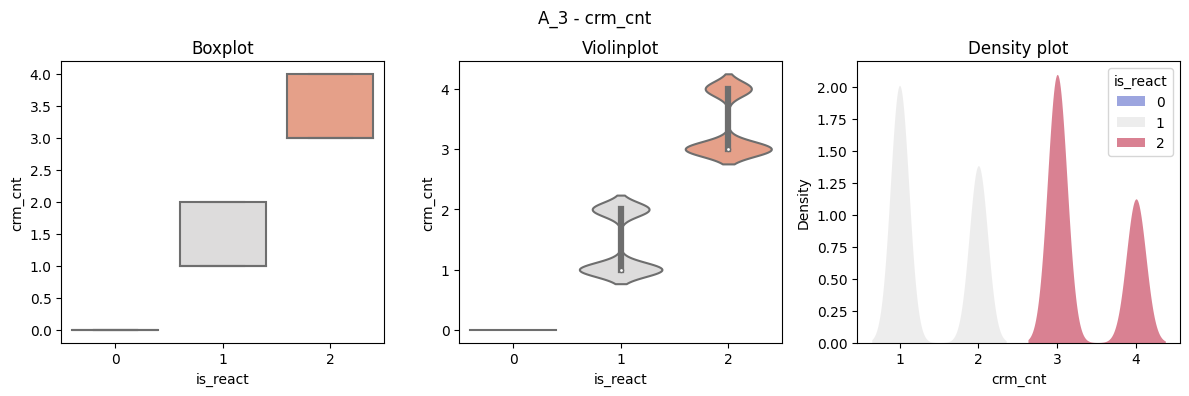

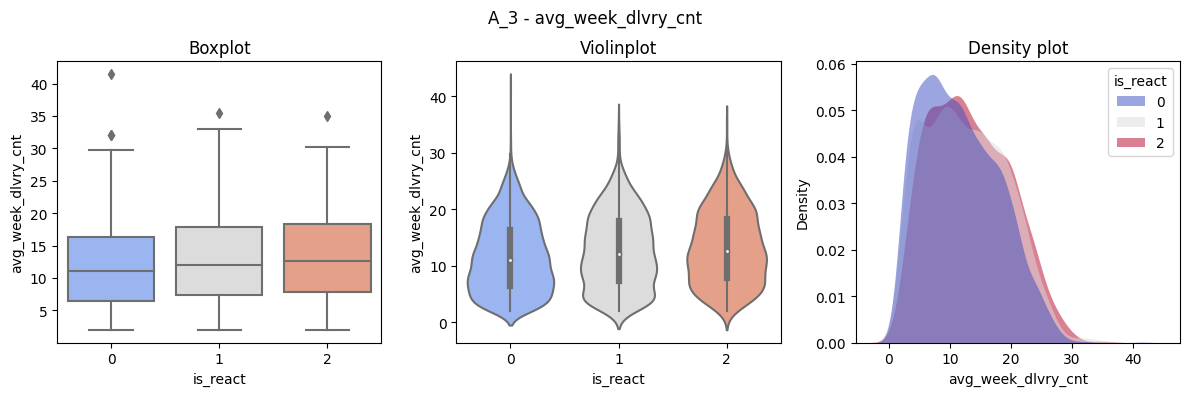

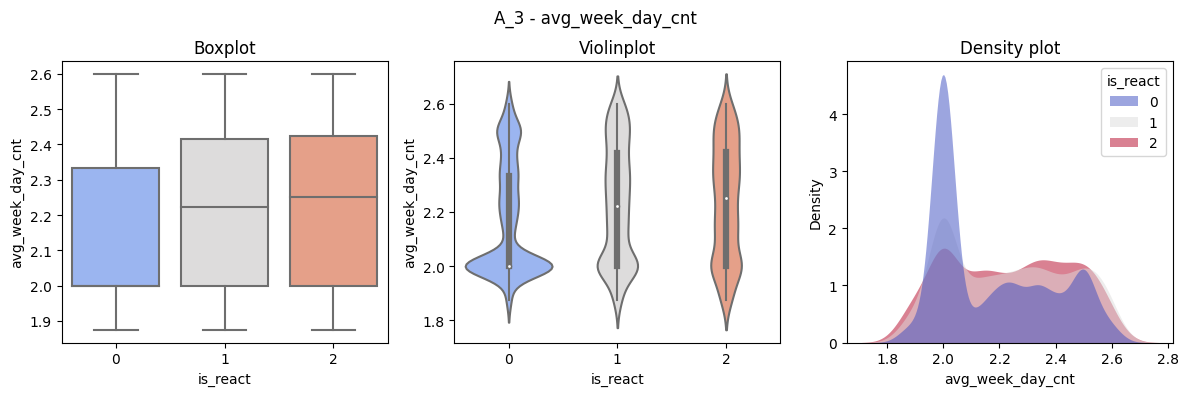

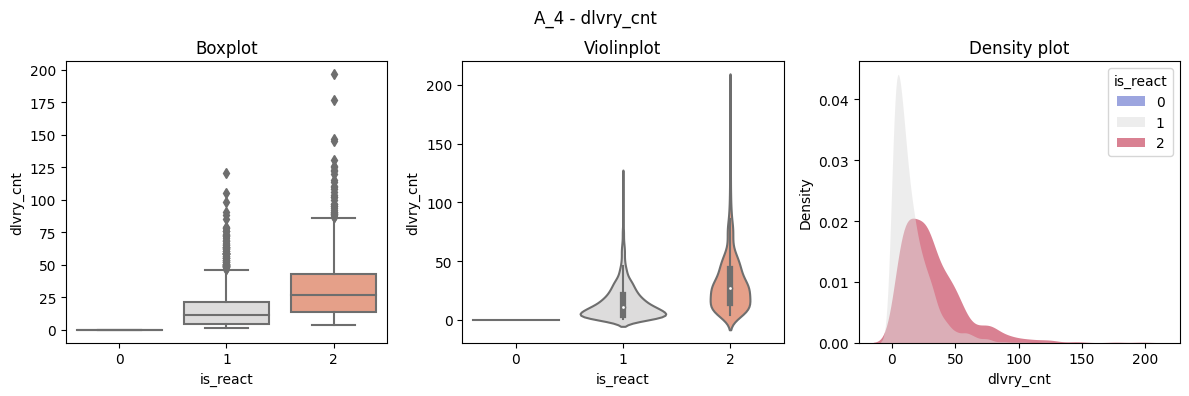

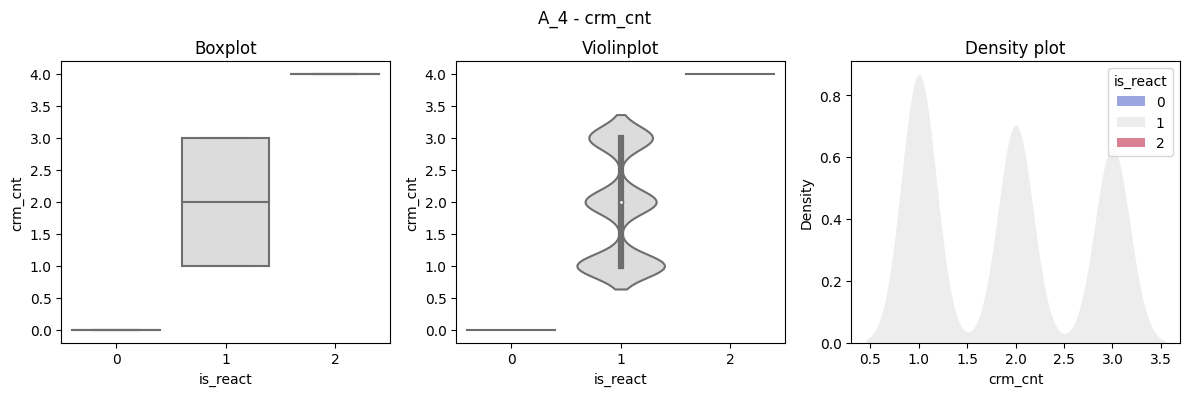

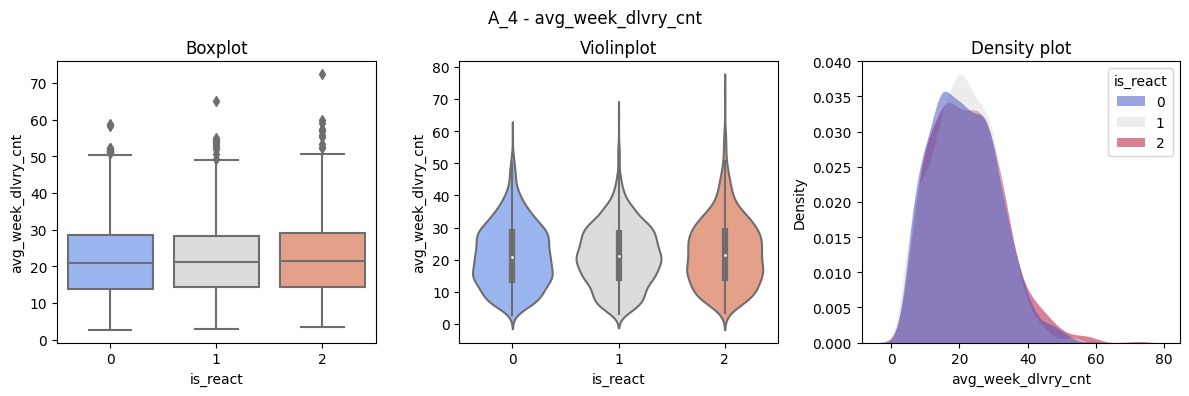

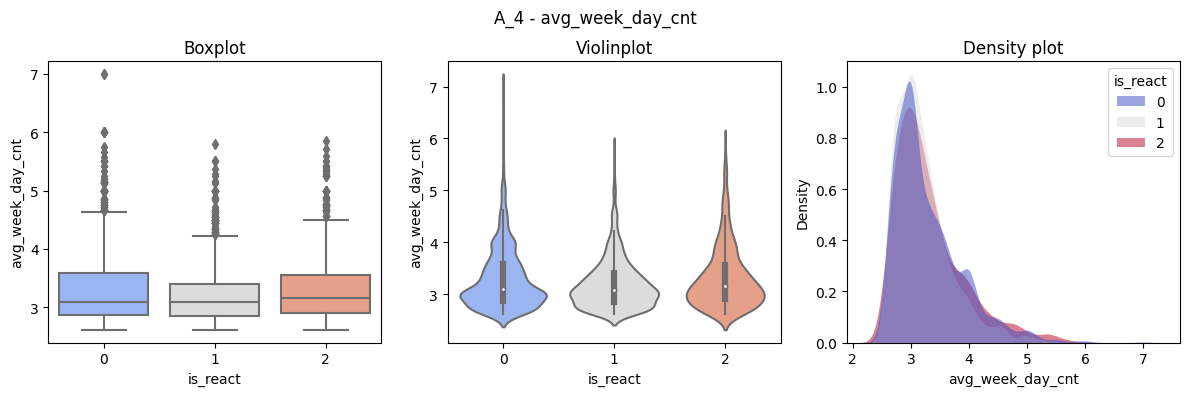

In [15]:
plot_numeric(df_A, num_vars, 'is_react', group_name)

In [16]:
num_vars = ['crm_cnt', 'avg_week_dlvry_cnt', 'avg_week_day_cnt']
group_name = df_B['group_final'].unique()
print(group_name)

['B_3' 'B_4']


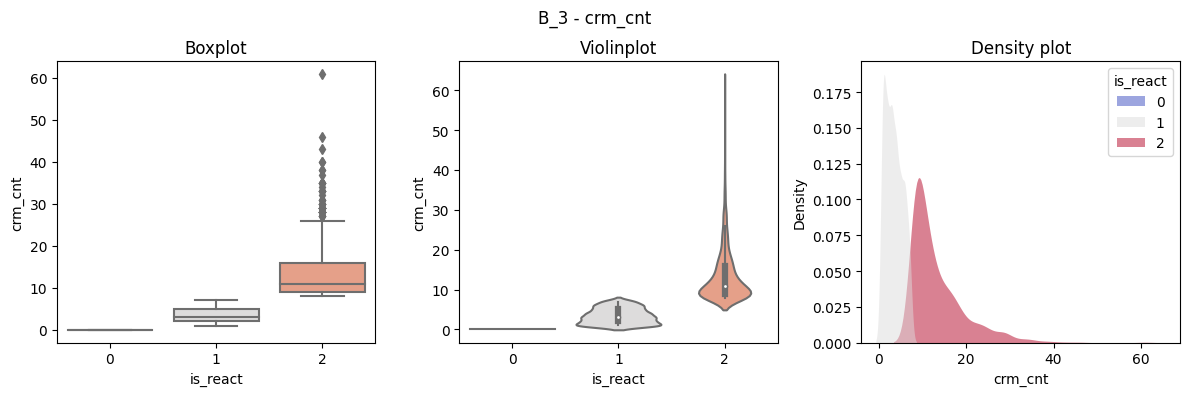

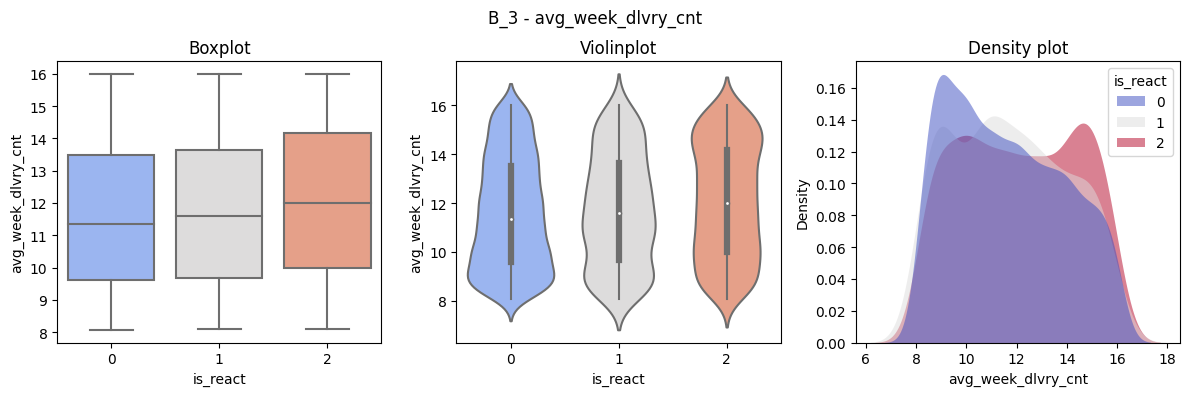

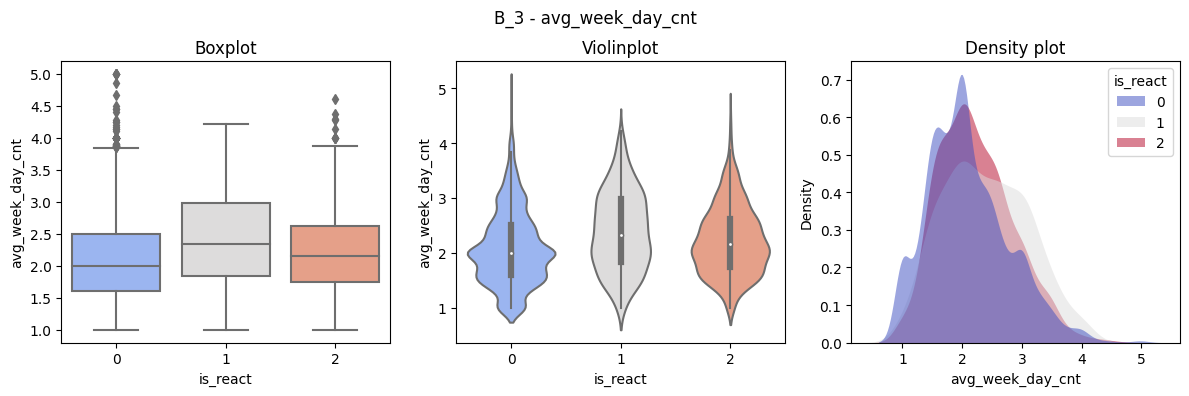

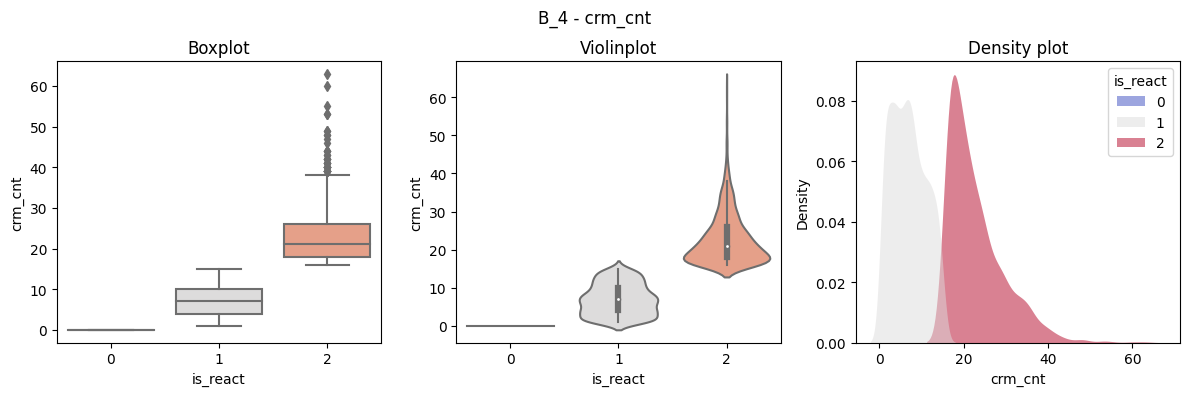

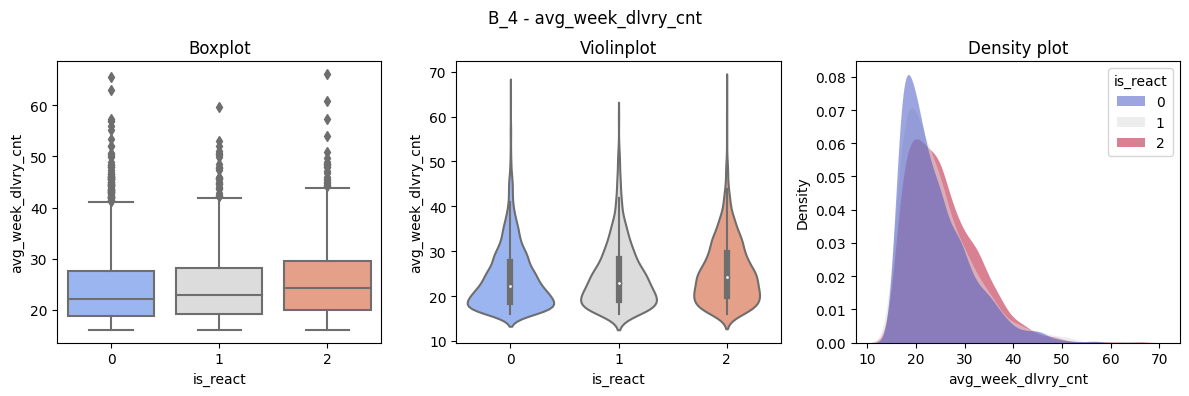

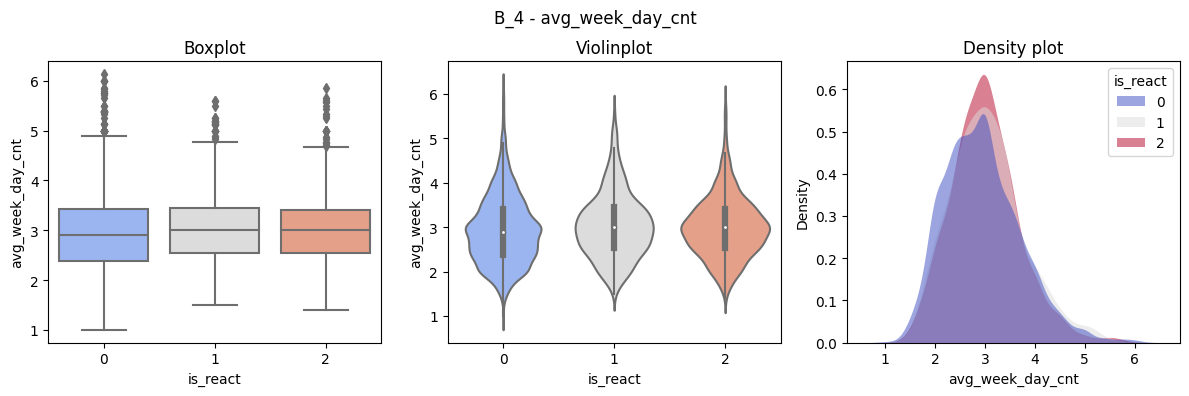

In [18]:
plot_numeric(df_B, num_vars, 'is_react', group_name)